# What is REST API and why to use api?

[REST](https://www.ics.uci.edu/~fielding/pubs/dissertation/rest_arch_style.htm): **Representational State Transfer**

- Architectural style for communication often used in Web service development.
- Uses a stateless operation in client server protocol to manipulate  server resources (image, blog etc.) in the web.

When using [http](https://www.ietf.org/rfc/rfc2616.txt)/https most common available operations are

# GET and POST requests and analyzing traffic in a command line (curl)



**GET**: To get the data from server

**POST**: To submit data

**PUT**: to update a resource

**DELETE**: to delete the resource


Response will have a payload formatted in HTML, XML, **JSON**, or some other format.

# JSON (Java Script object notation)
JSON is the primary format used for data exchange. Python has json library. We can use it to convert python objects to strings (**dumps method**) and  vice -versa (**loads method**).

# Status code for GET request
- 200: success
- 400: bad request
- 401: authentication failure
- 404: resouce not found (wrong endpoint)

Client applications use URI/URL to access RESTFUL web services.

REST API has __*base url + endpoint+ parameters*__

    - https://api.github.com/users

    - https://api.github.com/users/user_id/repos

**Before using python Requests module, let's use curl to see REST API in action**

Using github developer API we can get a list of users as

In [1]:
!curl https://api.github.com/users

[
  {
    "login": "mojombo",
    "id": 1,
    "node_id": "MDQ6VXNlcjE=",
    "avatar_url": "https://avatars.githubusercontent.com/u/1?v=4",
    "gravatar_id": "",
    "url": "https://api.github.com/users/mojombo",
    "html_url": "https://github.com/mojombo",
    "followers_url": "https://api.github.com/users/mojombo/followers",
    "following_url": "https://api.github.com/users/mojombo/following{/other_user}",
    "gists_url": "https://api.github.com/users/mojombo/gists{/gist_id}",
    "starred_url": "https://api.github.com/users/mojombo/starred{/owner}{/repo}",
    "subscriptions_url": "https://api.github.com/users/mojombo/subscriptions",
    "organizations_url": "https://api.github.com/users/mojombo/orgs",
    "repos_url": "https://api.github.com/users/mojombo/repos",
    "events_url": "https://api.github.com/users/mojombo/events{/privacy}",
    "received_events_url": "https://api.github.com/users/mojombo/received_events",
    "type": "User",
    "site_admin": false
  },
  {
    "l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 29925    0 29925    0     0  59303      0 --:--:-- --:--:-- --:--:-- 59493


## Analyzing traffinc in a browser (demo)

- Use Chrome
- Right click and Inspect
- Go over https traffic and network


# Look at the demo in the recorded lecture


### Using requests python module and NASA_API

# [Requests: HTTP for Humans](http://docs.python-requests.org/en/master/)

From the website

**"*Requests allows you to send organic, grass-fed HTTP/1.1 requests, without the need for manual labor.*"**

Let's try to get NASA data using web API

In [2]:
import requests

## APOD( Astronomy Picture of the Day)
For passing parameters to the API using python dictionary

In [3]:
parameters = {"api_key":"DEMO_KEY"}
response = requests.get("https://api.nasa.gov/planetary/apod", params=parameters)

In [4]:
print(response.status_code)

200


Codes are available as

In [5]:
requests.codes.ok

200

In [6]:
response.headers

{'Date': 'Fri, 19 Jan 2024 04:07:45 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'X-RateLimit-Limit, X-RateLimit-Remaining', 'Age': '0', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Vary': 'Accept-Encoding', 'Via': 'https/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])', 'X-Api-Umbrella-Request-Id': 'cd3vjk1fv98gv14hvol0', 'X-Cache': 'MISS', 'X-Ratelimit-Limit': '40', 'X-Ratelimit-Remaining': '39', 'X-Vcap-Request-Id': '8eb6395f-870f-4d29-608a-e58f5d9d639e', 'X-Frame-Options': 'DENY', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block'}

In [10]:
response.text

'{"copyright":"Ralf Rohner","date":"2024-01-18","explanation":"Northern lights shine in this night skyview from planet Earth\'s stratosphere, captured on January 15. The single, 5 second exposure was made with a hand-held camera on board an aircraft above Winnipeg, Canada. During the exposure, terrestrial lights below leave colorful trails along the direction of motion of the speeding aircraft. Above the more distant horizon, energetic particles accelerated along Earth\'s magnetic field at the planet\'s polar regions excite atomic oxygen to create the shimmering display of Aurora Borealis. The aurora\'s characteristic greenish hue is generated at altitudes of 100-300 kilometers and red at even higher altitudes and lower atmospheric densities. The luminous glow of faint stars along the plane of our Milky Way galaxy arcs through the night, while the Andromeda galaxy extends this northern skyview to extragalactic space. A diffuse hint of Andromeda, the closest large spiral to the Milky Wa

In [8]:
json_data = response.json()
type(json_data)

dict

In [ ]:
#!pip install pillow

In [11]:
from PIL import Image
from io import BytesIO
response = requests.get(json_data['url'])
img = Image.open(BytesIO(response.content))

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt


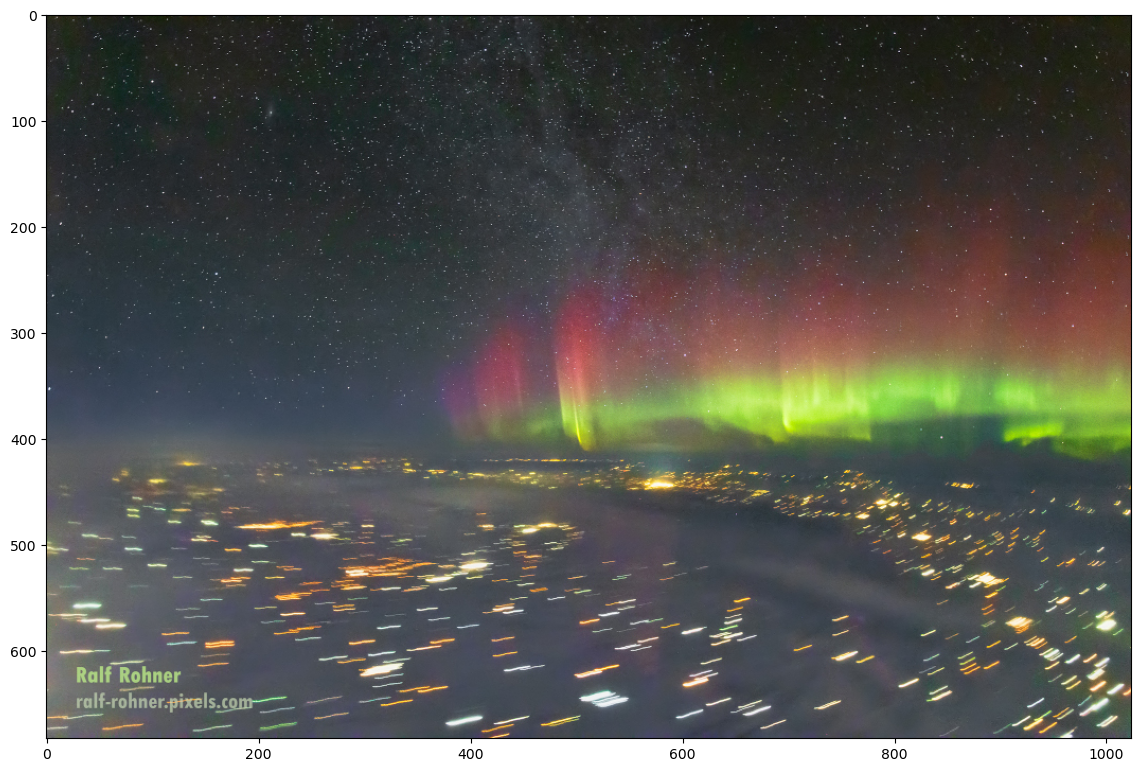

In [13]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.imshow(img)

## Mars rovers photo

In [14]:
parameters = {"api_key":"DEMO_KEY", "sol":1000, "camera":"fhaz"}
api_end_point= "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
response = requests.get(api_end_point, params=parameters)
response.status_code

200

In [15]:
json_data = response.json()
json_data

{'photos': [{'id': 102693,
   'sol': 1000,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01000/opgs/edr/fcam/FLB_486265257EDR_F0481570FHAZ00323M_.JPG',
   'earth_date': '2015-05-30',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active',
    'max_sol': 4070,
    'max_date': '2024-01-17',
    'total_photos': 694140,
    'cameras': [{'name': 'FHAZ', 'full_name': 'Front Hazard Avoidance Camera'},
     {'name': 'NAVCAM', 'full_name': 'Navigation Camera'},
     {'name': 'MAST', 'full_name': 'Mast Camera'},
     {'name': 'CHEMCAM', 'full_name': 'Chemistry and Camera Complex'},
     {'name': 'MAHLI', 'full_name': 'Mars Hand Lens Imager'},
     {'name': 'MARDI', 'full_name': 'Mars Descent Imager'},
     {'name': 'RHAZ', 'full_name': 'Rear Hazard Avoidance Came

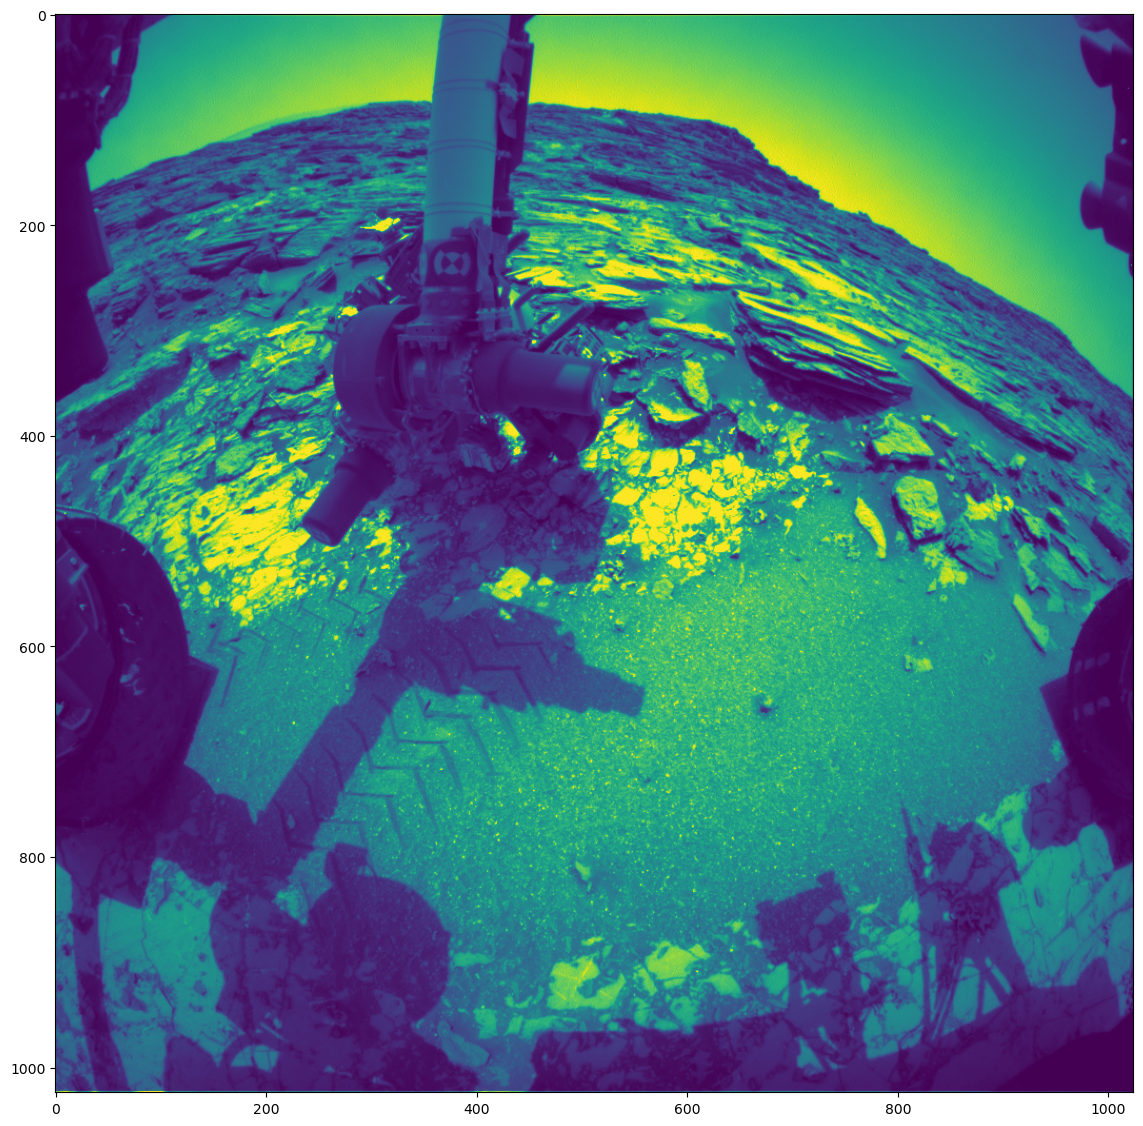

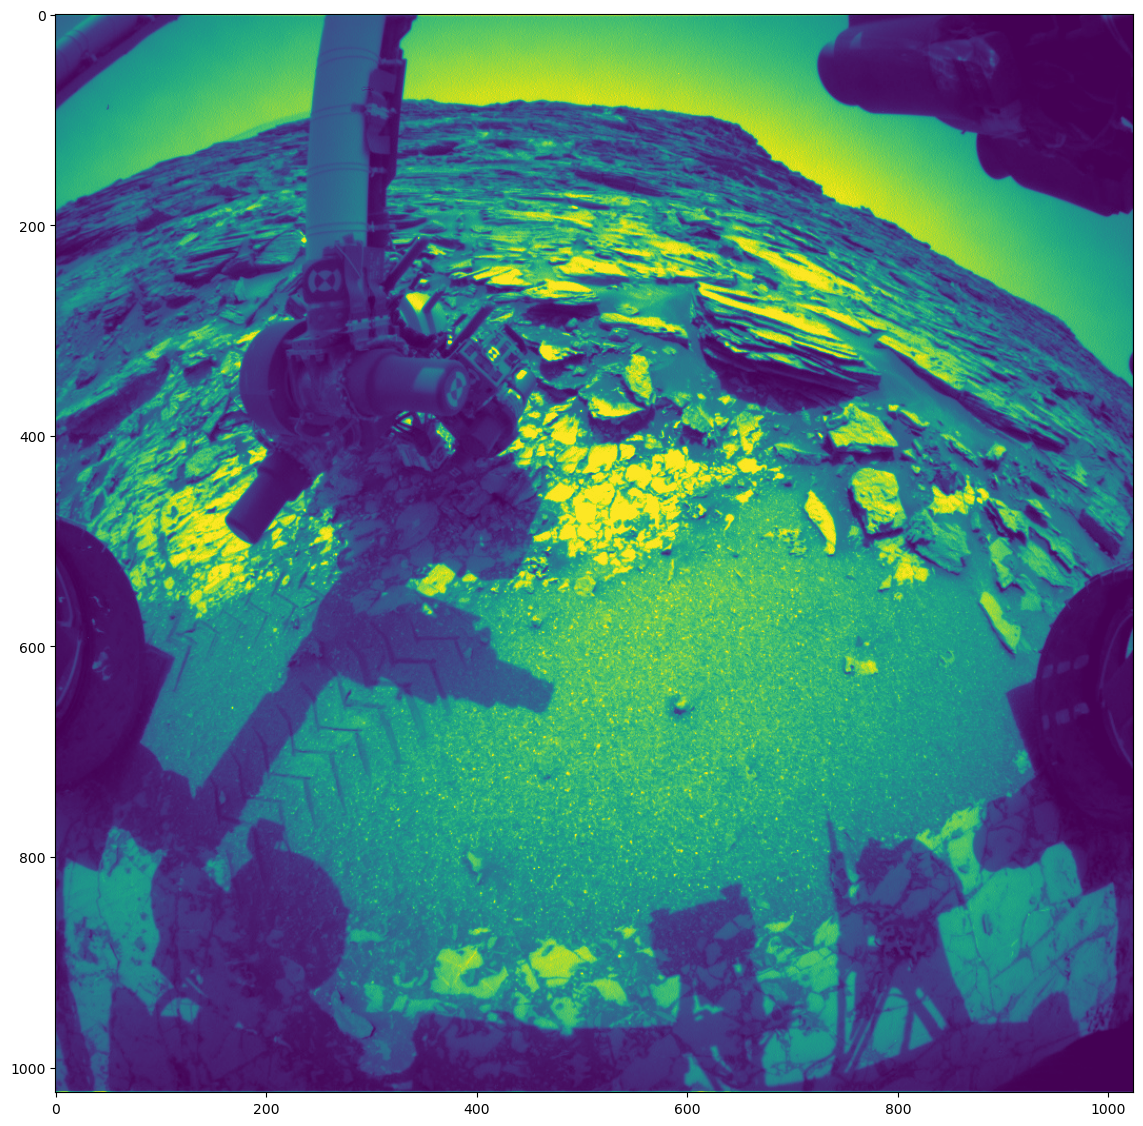

In [16]:

for image_data in json_data['photos']:
    response = requests.get(image_data['img_src'])
    fig, ax = plt.subplots(figsize=(14, 14))
    img = Image.open(BytesIO(response.content))
    ax.imshow(img)

# Twitter example with POST and GET

# Caution: this does not work as described due to a change of the rules by Twitter!!!

1. create new app at https://apps.twitter.com/app/new
1. [twitter api reference index](https://developer.twitter.com/en/docs/api-reference-index)


# POST oauth2/token
Allows a registered application to obtain an OAuth 2 Bearer Token, which can be used to make API requests on an application's own behalf, without a user context.
https://developer.twitter.com/en/docs/basics/authentication/api-reference/token


In [5]:
# Use your app credentials
client_key = 
client_secret = 

In [6]:
import base64

key_secret = '{}:{}'.format(client_key, client_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

In [7]:
base_url = 'https://api.twitter.com/'
auth_endpoint = base_url+'oauth2/token'

auth_headers = { 'Authorization': 'Basic {}'.format(b64_encoded_key),
                'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'}

auth_data = { 'grant_type': 'client_credentials'}



Let's post to authentication endpoint and get the token to be used in subsequent REST API call

In [9]:
response = requests.post(auth_endpoint, headers=auth_headers, data=auth_data)
response.status_code

200

In [10]:
json_data =  response.json()
json_data

{'access_token': 'AAAAAAAAAAAAAAAAAAAAAEGe9QAAAAAALnCjfdkTP%2FJGQxEZOPTqGQL7jUs%3DTVrscEzlzvKPhNerXde7Btkx2aJ2TYtpuCpaHC3TwRfIKnX4vL',
 'token_type': 'bearer'}

In [11]:
access_token = json_data['access_token']

# Let's do some search on climate change
This is how we got search endpoint

https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets

In [12]:
search_headers = {'Authorization': 'Bearer {}'.format(access_token)    
}

parameters = { 'q': 'climate change',
                    'result_type': 'recent',
                'count': 5 }

search_url = base_url+'1.1/search/tweets.json'

response = requests.get(search_url, headers=search_headers, params=parameters)

In [ ]:
json_tweet_data = response.json()


In [17]:
import pprint

In [ ]:
pprint.pprint(json_tweet_data)

In [ ]:
for status in json_tweet_data['statuses']:
    print(status['text'] + '\n')